In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [67]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go
import math
from scipy import stats
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Import data

In [194]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# reset index so there is only one number associated with each house
housing = housing.reset_index(drop = True)

# deletes duplicate point 
housing = housing.drop_duplicates()

# Convert dtypes
## Several numerical variables have more meaning as categorical variables and vise versa. 
codes modified from https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Modelling 

In [195]:
#Convert some numerical variables to categorical 
housing.MSSubClass = housing.MSSubClass.apply(lambda x: str(x))
housing.MoSold = housing.MoSold.apply(lambda x: str(x))
housing.YrSold = housing.YrSold.apply(lambda x: str(x))

# Alley
housing.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
housing.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope..idk if I'm going to inlude this 
# further investigation there is correlation ..severe slope = more expensiveaaa
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
housing.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
housing.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)


# Fill in missing values 

In [196]:
# The following features were converted to numerical so the null values can be filled with 0

converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']

housing[converted_features] = housing[converted_features].fillna(0)

In [197]:
# the following columns still have null data 
housing.columns[housing.isnull().sum() > 0]


Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature'],
      dtype='object')

In [198]:
missing = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature']  
housing[missing]

,LotFrontage,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,GarageType,GarageYrBlt,GarageCars,GarageArea,Fence,MiscFeature
0,NaN,NaN,0.0,238.0,0.0,618.0,856.0,SBrkr,1.0,0.0,Detchd,1939.0,2.0,399.0,NaN,NaN
1,42.0,BrkFace,149.0,552.0,393.0,104.0,1049.0,SBrkr,1.0,0.0,Attchd,1984.0,1.0,266.0,NaN,NaN
2,60.0,NaN,0.0,737.0,0.0,100.0,837.0,SBrkr,0.0,0.0,Detchd,1930.0,1.0,216.0,NaN,NaN
3,80.0,NaN,0.0,0.0,0.0,405.0,405.0,SBrkr,0.0,0.0,Detchd,1940.0,1.0,281.0,NaN,NaN
4,70.0,NaN,0.0,643.0,0.0,167.0,810.0,SBrkr,1.0,0.0,Attchd,2001.0,2.0,528.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,NaN,NaN,0.0,0.0,0.0,952.0,952.0,FuseF,0.0,0.0,Detchd,1916.0,1.0,192.0,NaN,NaN
2576,NaN,NaN,0.0,0.0,0.0,0.0,0.0,FuseA,0.0,0.0,Attchd,1955.0,2.0,452.0,NaN,NaN
2577,82.0,NaN,0.0,284.0,0.0,717.0,1001.0,FuseA,0.0,0.0,2Types,1949.0,3.0,871.0,NaN,NaN
2578,NaN,BrkFace,144.0,841.0,0.0,144.0,985.0,SBrkr,1.0,0.0,Attchd,2000.0,2.0,486.0,NaN,NaN


In [199]:
# categorical variables can be filled with none
missing_categorical = ['MasVnrType', 'Electrical', 'GarageType', 'Fence', 'MiscFeature']  

housing[missing_categorical] = housing[missing_categorical].fillna('None')

In [200]:
housing.columns[housing.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [201]:
# most missing numerical categories can be filled in with 0
#need to take a closer look at LotFrontage and GarageYrBlt

missing_numerical= ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageCars', 'GarageArea']

housing[missing_numerical]

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,NaN,0.0,238.0,0.0,618.0,856.0,1.0,0.0,1939.0,2.0,399.0
1,42.0,149.0,552.0,393.0,104.0,1049.0,1.0,0.0,1984.0,1.0,266.0
2,60.0,0.0,737.0,0.0,100.0,837.0,0.0,0.0,1930.0,1.0,216.0
3,80.0,0.0,0.0,0.0,405.0,405.0,0.0,0.0,1940.0,1.0,281.0
4,70.0,0.0,643.0,0.0,167.0,810.0,1.0,0.0,2001.0,2.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...
2575,NaN,0.0,0.0,0.0,952.0,952.0,0.0,0.0,1916.0,1.0,192.0
2576,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1955.0,2.0,452.0
2577,82.0,0.0,284.0,0.0,717.0,1001.0,0.0,0.0,1949.0,3.0,871.0
2578,NaN,144.0,841.0,0.0,144.0,985.0,1.0,0.0,2000.0,2.0,486.0


In [202]:
missing_numerical_drop_LotGar= ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                                'GarageCars', 'GarageArea']

In [203]:
housing[missing_numerical_drop_LotGar] = housing[missing_numerical_drop_LotGar].fillna(0)

In [204]:
housing.columns[housing.isnull().sum() > 0]

Index(['LotFrontage', 'GarageYrBlt'], dtype='object')

In [205]:
# Find what the mean proportion of the Lot Area is connected to the street 
proportion = (housing.LotFrontage/housing.LotArea).mean()
proportion

0.007917988032381118

In [206]:
# for any null values multiply the Lot Area by the proportion 
housing.LotFrontage.fillna((housing.LotArea * proportion), inplace=True)
housing[['LotFrontage', 'LotArea']]

,LotFrontage,LotArea
0,62.472926,7890
1,42.000000,4235
2,60.000000,6060
3,80.000000,8146
4,70.000000,8400
...,...,...
2575,70.105866,8854
2576,108.318076,13680
2577,82.000000,6270
2578,69.884162,8826


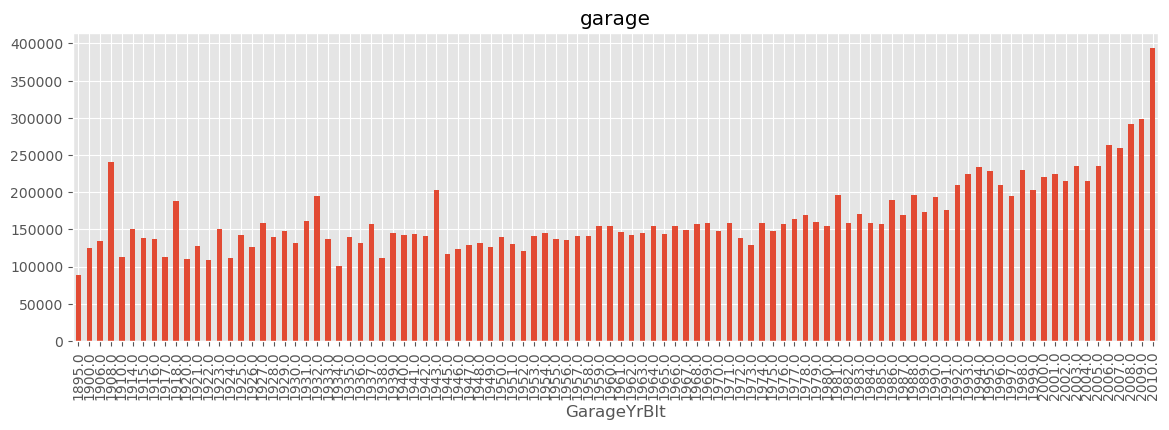

In [207]:
# for a numerical category the distance between 0 and 1895 is very large especially when they are not the cheapest house
housing.groupby(['GarageYrBlt']).SalePrice.mean().plot(kind='bar', figsize=(14,4))
plt.title('garage')
plt.show()

In [208]:
housing.YearBuilt.loc[housing.GarageYrBlt.isnull()].max()

2007

In [209]:
print('Year Built', housing.YearBuilt.loc[housing.GarageYrBlt.isnull()].mean())
print('Mean Price', housing.SalePrice.loc[housing.GarageYrBlt.isnull()].mean())

Year Built 1943.8992248062016
Mean Price 106814.6046511628


In [210]:
years = list(range(1930, 1950))

for year in years:
    price = housing.SalePrice.loc[housing.GarageYrBlt == year].mean()
    print(year)
    print(price)

1930
131696.0
1931
161333.33333333334
1932
194500.0
1933
137500.0
1934
100833.33333333333
1935
139666.66666666666
1936
131300.0
1937
157083.33333333334
1938
111455.0
1939
145157.14285714287
1940
143132.60869565216
1941
144500.0
1942
141125.0
1943
202500.0
1944
nan
1945
116300.0
1946
123650.0
1947
129375.0
1948
131084.2105263158
1949
126942.85714285714


In [212]:
housing.GarageYrBlt.unique()

array([1939., 1984., 1930., 1940., 2001., 2003., 1974., 2007., 2005., 1993., 1920., 1963., 2002.,   nan, 1977., 2006., 1948., 1950., 1997., 2000.,
       1973., 1938., 1922., 1964., 2008., 1999., 1921., 1976., 1983., 1958., 1990., 2004., 1949., 1966., 1972., 1960., 1991., 1954., 1978., 1969.,
       1916., 1971., 1975., 1959., 1970., 1956., 1979., 1965., 1961., 1962., 1981., 1992., 1998., 1917., 1980., 1955., 1996., 1910., 1957., 1994.,
       1943., 1968., 1951., 2009., 1900., 1995., 1925., 1988., 1952., 1953., 1987., 1926., 1989., 1945., 1941., 1937., 1982., 1927., 1986., 1915.,
       1967., 1985., 1908., 1947., 1936., 1924., 1928., 1934., 2010., 1946., 1929., 1935., 1932., 1942., 1931., 1914., 1933., 1923., 1918., 1906.,
       1895.])

In [213]:
#I'm going to change the garage yr built to years after house built 
housing.GarageYrBlt.fillna(housing.YearBuilt, inplace=True)

In [214]:
housing.GarageYrBlt.unique()

array([1939., 1984., 1930., 1940., 2001., 2003., 1974., 2007., 2005., 1993., 1920., 1963., 2002., 1914., 1977., 2006., 1948., 1970., 1950., 1997.,
       2000., 1973., 1938., 1922., 1964., 2008., 1999., 1921., 1976., 1983., 1958., 1990., 1895., 2004., 1949., 1966., 1923., 1987., 1972., 1960.,
       1991., 1925., 1954., 1978., 1969., 1916., 1971., 1975., 1959., 1956., 1979., 1965., 1955., 1961., 1962., 1981., 1992., 1998., 1917., 1980.,
       1996., 1910., 1957., 1994., 1943., 1968., 1951., 2009., 1900., 1995., 1988., 1952., 1953., 1947., 1926., 1945., 1989., 1941., 1937., 1982.,
       1927., 1986., 1915., 1967., 1985., 1908., 1936., 1931., 1924., 1928., 1872., 1934., 2010., 1946., 1929., 1919., 1890., 1935., 1932., 1942.,
       1918., 1933., 1906., 1912., 1902., 1905., 1875.])

In [216]:
values = (housing['GarageYrBlt'] - housing['YearBuilt'])


In [219]:
housing['GarageYrBlt'] = values
housing.GarageYrBlt.unique()

array([  0.,  40.,  21.,   1.,   2.,  70.,  26.,  -1.,   4.,   8.,  27.,  56.,  50.,  57.,  41.,  75., 106.,   7.,   9.,   5.,  36.,  19.,  46.,
        73.,  20.,  39.,  58.,  30.,  69.,   3.,  37.,  32.,  14.,  -5., -10.,  45.,  18.,  55.,  62.,  85.,  15.,  78.,  42.,  13.,  29.,  10.,
        53.,  33.,  89.,  31.,  22.,  25.,  47.,   6.,  49.,  12.,  35.,  93.,  88.,  60.,  -7.,  28.,  -2.,  11.,  61.,  59.,  86., -20.,  17.,
        98.,  43.,  16.,  52.,  77.,  48.,  68., 123.,  34.,  54.,  99.,  44.,  64., -15.,  23.,  38.,  71.,  74.,  67.,  87., 100.,  51., 113.,
        24.,  82.,  -9.,  91., -18., 101.,  80.,  95.,  79.,  65.,  -6.,  72.,  -3.])